In [1]:
import pyscf
from pyscf.tools import cubegen
import matplotlib.pyplot as plt
import numpy as np
import pyscf.lo as lo
import seaborn as sns
N=2
r=1.4
mol = pyscf.gto.M(
atom=";". join( f"H 0. 0. {i*r}" for i in range(N)),
basis='ccpvdz',
unit='B'
)

mf = pyscf.scf.RHF(mol)

mf.kernel()
orb = mf.mo_coeff
norb = mf.mo_coeff.shape[1]
eri_4fold = mol.ao2mo(orb, compact=False).reshape((norb, norb, norb, norb))


converged SCF energy = -1.12870944897989


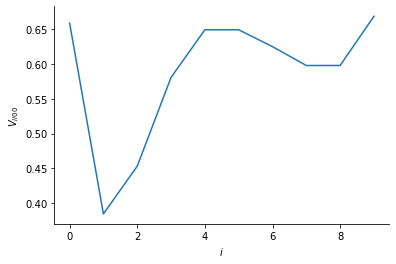

In [2]:
v = [eri_4fold[0,0,i,i] for i in range(norb)]
plt.plot(v)
plt.xlabel("$i$")
plt.ylabel("$V_{ii00}$")
sns.despine()
plt.savefig("vii00.pdf", bbox_inches='tight')

direct 1e integrals in MO:
 [[-1.25084046e+00  1.01222131e-15  1.57865411e-01  6.06069014e-16
  -2.50251165e-18 -1.97932037e-17 -5.35986320e-02 -1.82862250e-17
   7.50336720e-17  2.15973073e-16]
 [ 2.67808101e-16 -5.15772677e-01 -1.43794007e-16 -2.10457857e-01
   2.76180874e-17  1.26145245e-17  2.99565060e-16 -8.32925597e-17
   3.72499701e-17 -1.92613430e-02]
 [ 1.57865411e-01  3.05933054e-16 -3.41804172e-01  2.60642202e-16
  -1.24668832e-16 -8.04541787e-18  9.28534164e-02  1.35030956e-16
  -2.38160007e-16  1.56580478e-15]
 [ 2.35705552e-16 -2.10457857e-01  1.53956708e-16 -1.05235042e-01
  -4.43609320e-17  1.22792799e-17  6.59194921e-17  4.20343421e-17
  -1.96592381e-17 -1.75793428e-01]
 [-2.50251165e-18  2.76180874e-17 -1.24668832e-16 -4.43609320e-17
   1.17390310e-01  6.93889390e-18  1.11232219e-16 -1.66533454e-16
  -7.94503352e-16 -1.65164114e-16]
 [-1.97932037e-17  1.26145245e-17 -8.04541787e-18  1.22792799e-17
   1.38777878e-17  1.17390310e-01  2.24747728e-16 -1.38777878e-17
  -2.

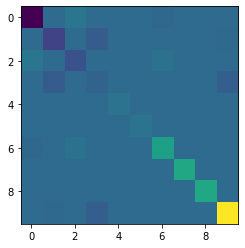

In [34]:
ham_1e_kin = pyscf.gto.getints("int1e_kin_sph", mol._atm, mol._bas, mol._env)
ham_1e_nuc = pyscf.gto.getints("int1e_nuc_sph", mol._atm, mol._bas, mol._env)

ham_1e = ham_1e_kin + ham_1e_nuc

# transform into MO basis
ham_1e_mo = np.einsum('kl,ki,lj', ham_1e, mf.mo_coeff, mf.mo_coeff)
print('direct 1e integrals in MO:\n', ham_1e_mo)
plt.imshow(ham_1e_mo)

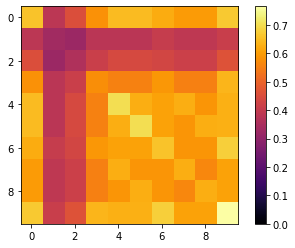

In [3]:
import itertools
viijj = np.asarray([eri_4fold[j,j,i,i] for i,j in itertools.product(range(norb),range(norb))]).reshape(norb,norb)
plt.imshow(viijj,cmap='inferno',vmin=0)
plt.colorbar()
plt.savefig("viijj.pdf", bbox_inches='tight')